# 0.2 numpy 트레이닝 - 2
last updated : 2023-09-09
Author: 오지환

파이썬을 활용한 파생상품평가에 핵심이되는 pandas 라이브러리에 대해서 설명한다.
pandas는 Python 프로그래밍 언어로 작성된 데이터 조작 및 분석을 위한 소프트웨어 라이브러리로 NumPy를 기반으로 구현되어 있으며, 데이터 분석 작업에 특화되어 있다.
이번 파생상품 밸류에이션에서는 numpy가 주로 쓰이지만, pandas를 활용하여, excel과 관련된 모듈을 사용하지 않더라도 손쉽게 엑셀로 데이터들을 export할 수 있는 장점이 있다. 
단, 본 pandas 트레이닝은 pandas에 대한 매우 기초적인 내용만 다루며, 해당 목차의 내용을 바탕으로 구글링을 통해서 부족한 부분을 학습하기를 권장한다.

In [ ]:
# pandas 및 numpy 모듈 불러오기

import pandas as pd
import numpy as np

### 1. Series 와 Dataframe

Series는 pandas의 1차원 배열 형태의 자료구조이다. 각 값에는 고유한 레이블(인덱스)가 지정되며, 아래는 Series를 생성하는 방법들을 몇 가지 예시이다.

In [ ]:
# 리스트를 통해서 Series 생성
list_series = pd.Series([1, 3, 5, np.nan, 6, 8])
print(list_series)

# 출력 : 
"""
0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
"""

# 딕셔너리를 이용하여 Series 생성
dict_series = pd.Series({'a': 1, 'b': 2, 'c': 3})
print(dict_series)

# 출력 : 
"""
a    1
b    2
c    3
dtype: int64
"""


DataFrame은 pandas의 2차원 배열 형태의 자료구조로 가장 떠올리기 쉬운 것은 엑셀의 테이블이다.

Series와 같이 여러 종류의 입력 데이터를 받아서 DataFrame을 생성할 수 있다.
- numpy 배열을 이용하여 DataFrame 생성
- 딕셔너리를 이용하여 DataFrame 생성
- 리스트의 리스트를 이용하여 DataFrame 생성
예시는 3개만 나열하였지만, 더욱 다양하게 Dataframe을 만들 수 있다.

In [ ]:
# numpy 배열을 이용하여 DataFrame 생성

numpy_df = pd.DataFrame(np.random.random([6,4]), columns=['A', 'B', 'C', 'D'])
print(numpy_df)

# 출력 : 
"""
          A         B         C         D
0  0.436018  0.030753  0.503209  0.106000
1  0.363089  0.425938  0.000406  0.259711
2  0.473539  0.679867  0.411641  0.852654
3  0.914668  0.260859  0.766119  0.245613
4  0.525223  0.502061  0.001775  0.870397
5  0.562465  0.948550  0.543647  0.756816

"""

# 딕셔너리를 이용하여 DataFrame 생성

dict_df = pd.DataFrame({
    'A': [1,2,3,4],
    'B': [5,6,7,8],
    'C': [9,10,11,12],
    'D': [13,14,15,16],
})
print(dict_df)

# 출력 : 
"""
   A  B   C   D
0  1  5   9  13
1  2  6  10  14
2  3  7  11  15
3  4  8  12  16

"""

# 리스트의 리스트를 이용하여 DataFrame 생성

data = [['홍길동',10],['영희',12],['철수',13]]
list_df = pd.DataFrame(data,columns=['Name','Age'])
print(list_df)

# 출력 : 
"""
  Name  Age
0  홍길동   10
1   영희   12
2   철수   13
"""

### 2. 데이터 불러오기, 저장하기
pandas는 엑셀에서 흔히 사용하는 2차원 배열의 데이터를 분석하기 위해서 만들어졌으며, 따라서, csv 혹은 excel로 부터 데이터를 불러오고, 작업한 데이터를 저장할 수 있다.
실습에 대한 파일은 본 실습파일이 위치한 github 저장소에 같이 저장되어있다.

- csv 파일명 : Ch0_pandas_csv_example.csv
- excel 파일명 : Ch0_pandas_excel_example.xlsx

read_csv, read_excel과 데이터프레임에서 to_excel, to_csv 등의 간단한 명령어만으로도 데이터를 읽고 쓸 수 있다. 

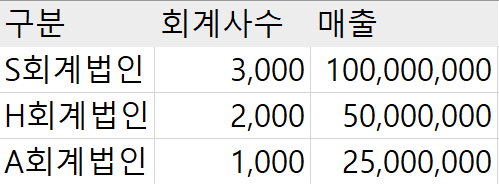

In [ ]:
csv_file_path = "Ch0_pandas_csv_example.csv"
excel_file_path = "Ch0_pandas_excel_example.xlsx"

# csv 파일 읽기
csv_df = pd.read_csv(csv_file_path)

# excel 파일 읽기
excel_df = pd.read_excel(excel_file_path, engine='openpyxl')

In [ ]:

dict_df = pd.DataFrame({
    'A': [1,2,3,4],
    'B': [5,6,7,8],
    'C': [9,10,11,12],
    'D': [13,14,15,16],
})

print(dict_df)

# 출력 : 
"""
   A  B   C   D
0  1  5   9  13
1  2  6  10  14
2  3  7  11  15
3  4  8  12  16
"""

dict_df.to_excel("Ch0_pandas_excel_output.xlsx")
dict_df.to_csv("Ch0_pandas_excel_output.csv")

### 3. 데이터 병합하기, 이어붙이기 ( concat, merge )
concat() 함수는 여러 DataFrame을 하나로 결합합니다. 기본적으로 이 함수는 데이터프레임을 수직으로 결합합니다. 같은 컬럼내 서로 다른 데이터가 존재하는 데이터프레임 행 기반으로 아래로 이어붙일 때, 사용됩니다. 이는 SQL에서의 UNION과 유사하게 동작합니다.

In [57]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2']},
                   index=[0, 1, 2])

print(df1)

# 출력 : 
"""
    A   B
0  A0  B0
1  A1  B1
2  A2  B2

"""

    A   B
0  A0  B0
1  A1  B1
2  A2  B2


'\n    A   B\n0  A0  B0\n1  A1  B1\n2  A2  B2\n\n'

In [58]:
df2 = pd.DataFrame({'A': ['A3', 'A4', 'A5'],
                    'B': ['B3', 'B4', 'B5']},
                   index=[3, 4, 5])
print(df2)

# 출력 : 
"""
    A   B
3  A3  B3
4  A4  B4
5  A5  B5
"""

    A   B
3  A3  B3
4  A4  B4
5  A5  B5


'\n    A   B\n3  A3  B3\n4  A4  B4\n5  A5  B5\n'

In [59]:
result = pd.concat([df1, df2])
print(result)

# 출력 : 
"""
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4
5  A5  B5

"""

    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4
5  A5  B5


'\n    A   B\n0  A0  B0\n1  A1  B1\n2  A2  B2\n3  A3  B3\n4  A4  B4\n5  A5  B5\n\n'

merge() 함수는 두 DataFrame의 공통 열 혹은 인덱스를 기준으로 두 개의 테이블을 합칩니다. 이는 SQL에서의 JOIN과 유사하게 동작합니다.

In [ ]:
df4 = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                    'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2']})
print(df4)

# 출력 : 
"""
  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
"""

In [ ]:
df5 = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                    'C': ['C0', 'C1', 'C2'],
                    'D': ['D0', 'D1', 'D2']})
print(df5)
# 출력 : 
"""
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
"""

In [ ]:
result = pd.merge(df4, df5, on='key')
print(result)
# 출력 : 
"""
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
"""